<a href="https://www.kaggle.com/code/istvnhabram/titanic?scriptVersionId=189613969" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Inspect the data frames

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
dataframes = [train_data, test_data]

def print_missing_ratio(feature):
    for (df, portion) in zip(dataframes, ["TRAIN", "TEST"]):
        missing = (df[feature].isna().sum() / len(df))*100
        print(f"{round(missing, 2)}% of {feature.capitalize()} data is missing in the {portion} set.")

# Exploring the gender distribution
## The male passangers are overrepresented, however more female passenger survived, not just relatively, but in an absolute manner. The gender distribution matches in the train and in the test set.

0.0% of Sex data is missing in the TRAIN set.
0.0% of Sex data is missing in the TEST set.


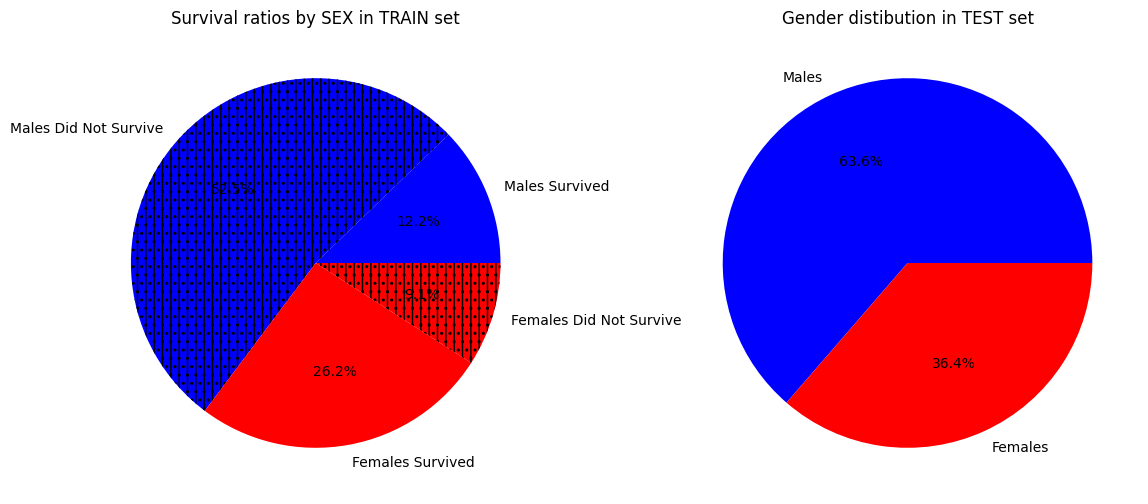

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

counts = {
    'Males Survived': train_data[(train_data['Sex'] == 'male') & (train_data['Survived'] == 1)].shape[0],
    'Males Did Not Survive': train_data[(train_data['Sex'] == 'male') & (train_data['Survived'] == 0)].shape[0],
    'Females Survived': train_data[(train_data['Sex'] == 'female') & (train_data['Survived'] == 1)].shape[0],
    'Females Did Not Survive': train_data[(train_data['Sex'] == 'female') & (train_data['Survived'] == 0)].shape[0]
}

axes[0].pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%', colors=['b','b','r','r'], hatch=['', '.||.', '', '.||.'])
axes[0].set_title("Survival ratios by SEX in TRAIN set")

counts = {
    'Males': test_data[(test_data['Sex'] == 'male')].shape[0],
    'Females': test_data[(test_data['Sex'] == 'female')].shape[0],
}

axes[1].pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%', colors=['b','r'])
axes[1].set_title("Gender distibution in TEST set")

print_missing_ratio("Sex")

plt.show()    

# Exploring the age distribution
## The age distribution is similar in the train and the test data. Regarding both genders and in overall. Around 20% of the age data is missing.

19.87% of Age data is missing in the TRAIN set.
20.57% of Age data is missing in the TEST set.


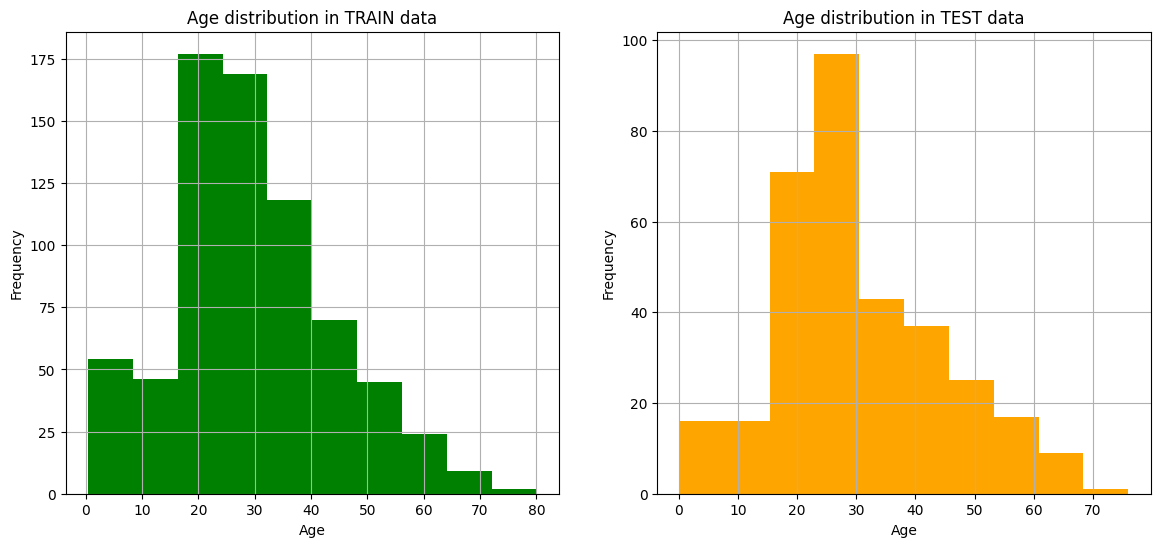

In [6]:
titles = ["Age distribution in TRAIN data", "Age distribution in TEST data"]

color = ["green", "orange"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for idx, (df, title, c) in enumerate(zip(dataframes, titles, color)):
    df["Age"].hist(bins=10, ax=axes[idx], color=c)
    axes[idx].set_title(title)
    axes[idx].set_xlabel("Age")
    axes[idx].set_ylabel("Frequency")
    
print_missing_ratio("Age")

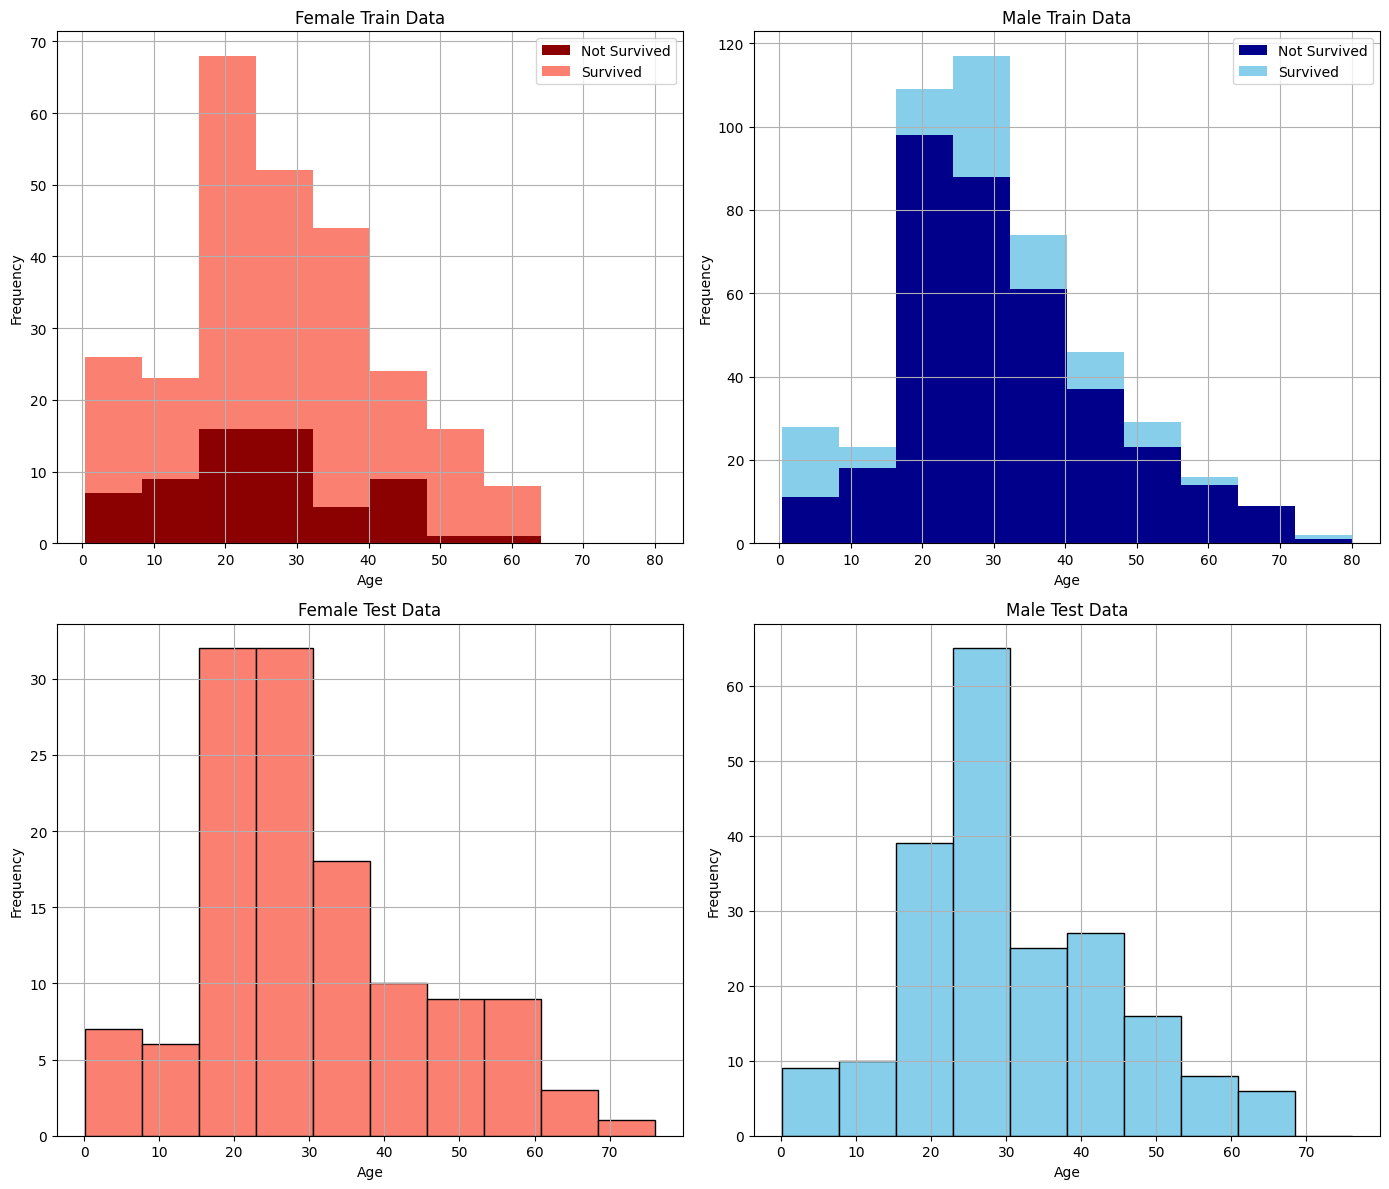

In [7]:
# Initialize the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

# Define color schemes
colors = {'male': ['darkblue', 'skyblue'], 'female': ['darkred', 'salmon']}

# Titles for each subplot
titles = ['Female Train Data', 'Male Train Data', 'Female Test Data', 'Male Test Data']

# Plot train data
for idx, sex in enumerate(['female', 'male']):
    ax = axes[idx]
    subset = train_data[train_data['Sex'] == sex]

    survived = subset[subset['Survived'] == 1]['Age']
    not_survived = subset[subset['Survived'] == 0]['Age']

    bins = np.linspace(train_data['Age'].min(), train_data['Age'].max(), 11)

    ax.hist([not_survived, survived], bins=bins, stacked=True, color=colors[sex], label=['Not Survived', 'Survived'])
    ax.set_title(f'{titles[idx]}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True)

# Plot test data
for idx, sex in enumerate(['female', 'male']):
    ax = axes[idx + 2]
    subset = test_data[test_data['Sex'] == sex]

    bins = np.linspace(test_data['Age'].min(), test_data['Age'].max(), 11)

    ax.hist(subset['Age'], bins=bins, edgecolor='black', color=colors[sex][1])
    ax.set_title(f'{titles[idx + 2]}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# Exploring the influence of having a child / parent on board
## Considering cases only, when at least one child or parent is on board. The distribution is similar on train and test sets. Having a child or parent on board does not seem to increase the survival chances

0.0% of Parch data is missing in the TRAIN set.
0.0% of Parch data is missing in the TEST set.


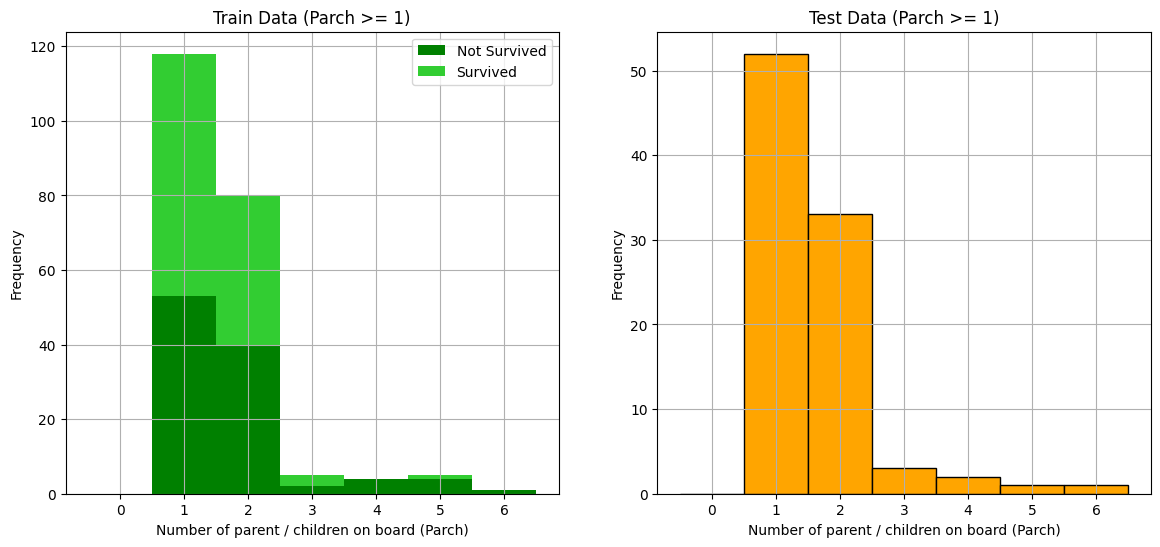

In [8]:
train_data_filtered = train_data[train_data['Parch'] >= 1]
test_data_filtered = test_data[test_data['Parch'] >= 1]

# Initialize the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot train data
ax = axes[0]
survived = train_data_filtered[train_data_filtered['Survived'] == 1]['Parch']
not_survived = train_data_filtered[train_data_filtered['Survived'] == 0]['Parch']

bins = np.arange(train_data['Parch'].min(), train_data['Parch'].max() + 2) - 0.5

ax.hist([not_survived, survived], bins=bins, stacked=True, color=['green', 'limegreen'], label=['Not Survived', 'Survived'])
ax.set_title('Train Data (Parch >= 1)')
ax.set_xlabel('Number of parent / children on board (Parch)')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid(True)

# Plot test data
ax = axes[1]
ax.hist(test_data_filtered['Parch'], bins=bins, edgecolor='black', color='orange')
ax.set_title('Test Data (Parch >= 1)')
ax.set_xlabel('Number of parent / children on board (Parch)')
ax.set_ylabel('Frequency')
ax.grid(True)

print_missing_ratio("Parch")

plt.show()

# Exploring the influence of having a sibling / spouse on board
## Considering cases only, when at least one sibling or spouse is on board. The distribution is similar on train and test sets. Having a sibling or a spouse on board seem to increase the survival chances.

0.0% of Sibsp data is missing in the TRAIN set.
0.0% of Sibsp data is missing in the TEST set.


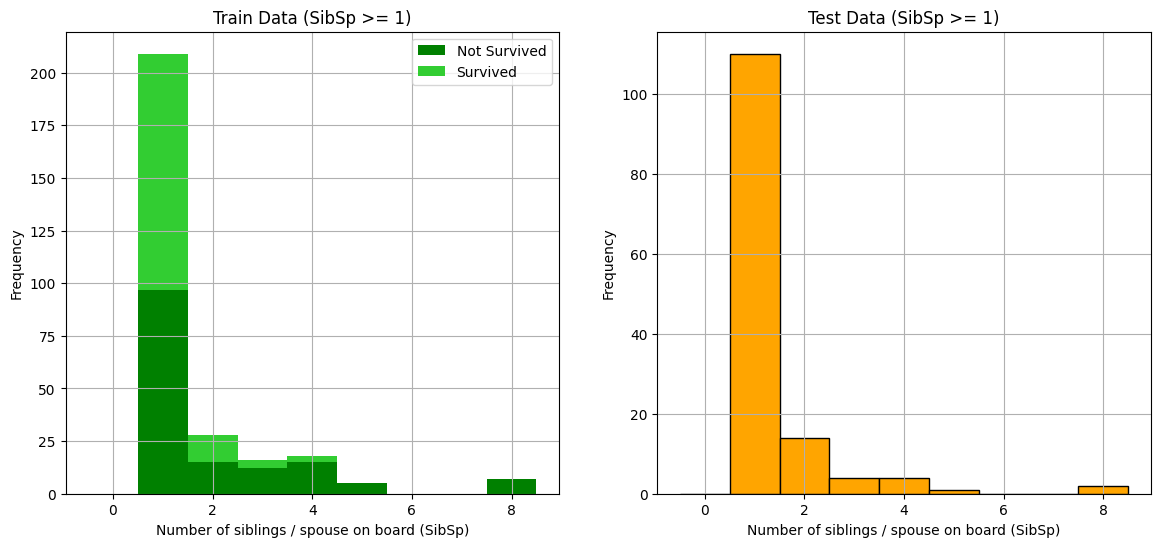

In [9]:
train_data_filtered = train_data[train_data['SibSp'] >= 1]
test_data_filtered = test_data[test_data['SibSp'] >= 1]

# Initialize the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot train data
ax = axes[0]
survived = train_data_filtered[train_data_filtered['Survived'] == 1]['SibSp']
not_survived = train_data_filtered[train_data_filtered['Survived'] == 0]['SibSp']

bins = np.arange(train_data['SibSp'].min(), train_data['SibSp'].max() + 2) - 0.5

ax.hist([not_survived, survived], bins=bins, stacked=True, color=['green', 'limegreen'], label=['Not Survived', 'Survived'])
ax.set_title('Train Data (SibSp >= 1)')
ax.set_xlabel('Number of siblings / spouse on board (SibSp)')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid(True)

# Plot test data
ax = axes[1]
ax.hist(test_data_filtered['SibSp'], bins=bins, edgecolor='black', color='orange')
ax.set_title('Test Data (SibSp >= 1)')
ax.set_xlabel('Number of siblings / spouse on board (SibSp)')
ax.set_ylabel('Frequency')
ax.grid(True)

print_missing_ratio("SibSp")

plt.show()

# Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission_RF.csv', index=False)
print("Submission file was successfully saved!")

Submission file was successfully saved!


# Support Vector Machines

In [11]:
from sklearn import svm

model = svm.SVC()
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission_SVM.csv', index=False)
print("Submission file was successfully saved!")

Submission file was successfully saved!


# K Nearest Neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission_KNN.csv', index=False)
print("Submission file was successfully saved!")

Submission file was successfully saved!


# Comparing different models with different parameters

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up models and their parameters for grid search
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Define hyperparameter grids for each model
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

# Store results for comparison
results = {}

# Iterate through models and perform grid search
for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best model and evaluate on the validation set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)

    # Store results
    results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'Validation Accuracy': accuracy
    }

    print(f"{model_name} - Best Parameters: {grid_search.best_params_}, Validation Accuracy: {accuracy:.4f}")

# Display the results
print("\nModel Comparison:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics}")

# Find the best model
best_model_name = max(results, key=lambda k: results[k]['Validation Accuracy'])
print(f"\nBest Model: {best_model_name} with accuracy: {results[best_model_name]['Validation Accuracy']:.4f}")


Training Random Forest...
Random Forest - Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}, Validation Accuracy: 0.7821
Training SVM...
SVM - Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}, Validation Accuracy: 0.7933
Training KNN...
KNN - Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}, Validation Accuracy: 0.7989

Model Comparison:
Random Forest: {'Best Parameters': {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}, 'Validation Accuracy': 0.7821229050279329}
SVM: {'Best Parameters': {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}, 'Validation Accuracy': 0.7932960893854749}
KNN: {'Best Parameters': {'n_neighbors': 7, 'weights': 'uniform'}, 'Validation Accuracy': 0.7988826815642458}

Best Model: KNN with accuracy: 0.7989
